In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Bike_Price_Prediction (1).csv')

In [3]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 24.2+ KB


In [5]:
data.isnull().count()

S.no                  308
Bike_company          308
Bike_model            308
Manufactured_year     308
Engine_warranty       308
Engine_type           308
Fuel_type             308
CC(Cubic capacity)    308
Fuel_Capacity         308
Price                 308
dtype: int64

In [6]:
data['Bike_company'].value_counts()

Bike_company
Suzuki                      20
Yamaha                      20
Hero                        19
Ducati                      19
Mahindra                    17
Honda                       16
Triumph                     15
KTM                         15
Lectro Electric             13
Kawasaki                    13
Bajaj                       12
Banelli                     12
BMW                         12
Harley Davidson             11
Li-ion Elektrik Solution    11
CFMoto                      11
Royal Enfield               10
Ather Energy                 9
Okinawa                      9
TVS                          8
Revolt Motors                8
Bgauss                       8
Jawa                         7
22Kymco                      7
Odysse                       6
Name: count, dtype: int64

In [7]:
data.columns

Index(['S.no', 'Bike_company', 'Bike_model', 'Manufactured_year',
       'Engine_warranty', 'Engine_type', 'Fuel_type', 'CC(Cubic capacity)',
       'Fuel_Capacity', 'Price'],
      dtype='object')

<Axes: xlabel='Engine_type', ylabel='Price'>

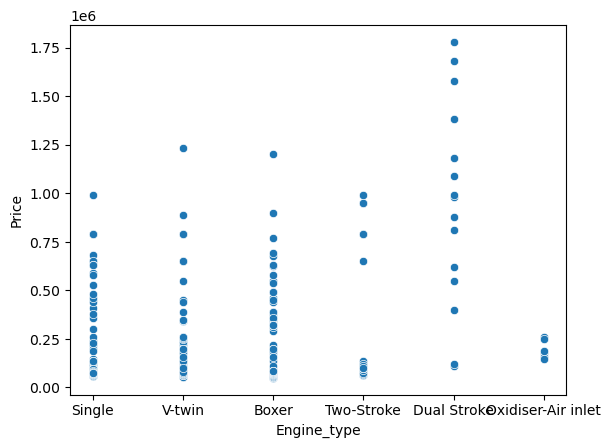

In [8]:
sns.scatterplot(x=data['Engine_type'],y=data['Price'])

<Axes: xlabel='Fuel_Capacity', ylabel='Price'>

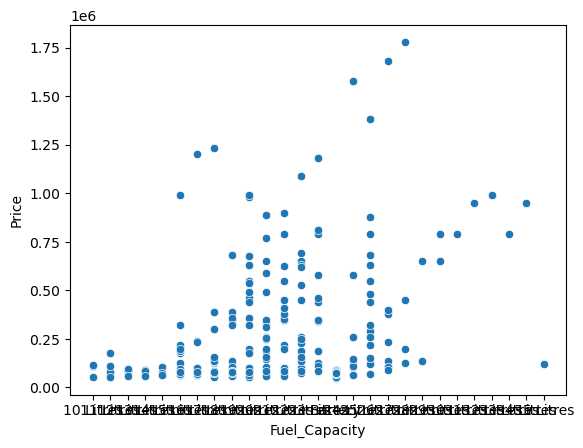

In [9]:
sns.scatterplot(x=data['Fuel_Capacity'],y=data['Price'])

<Axes: xlabel='Price'>

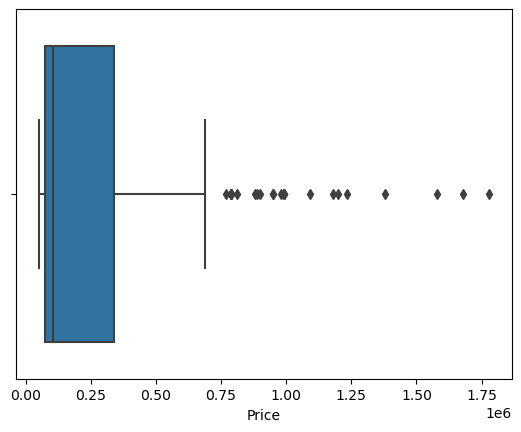

In [10]:
sns.boxplot(data,x='Price')

In [11]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)

In [12]:
iqr=q3-q1

In [13]:
iqr

266250.0

In [14]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(740625.0, -324375.0)

In [15]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [16]:
data['Price']=data['Price'].apply(limit_imputer)

In [17]:
data.describe()

,S.no,Manufactured_year,Engine_warranty,Price
count,308.000000,308.000000,306.000000,308.000000
mean,154.496753,2010.847403,6.032680,230670.980519
std,89.059088,104.747343,3.719542,221360.253105
min,1.000000,202.000000,2.000000,50000.000000
25%,77.750000,2017.000000,4.000000,75000.000000
50%,154.500000,2019.000000,5.000000,104500.000000
75%,231.250000,2020.000000,8.000000,341250.000000
max,308.000000,2050.000000,50.000000,740625.000000


<Axes: xlabel='Price'>

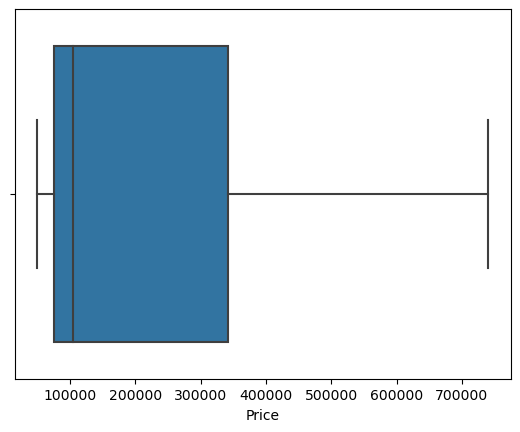

In [18]:
sns.boxplot(data,x='Price')

(array([179.,  28.,  16.,  23.,  12.,   8.,  13.,  29.]),
 array([ 50000.   , 136328.125, 222656.25 , 308984.375, 395312.5  ,
        481640.625, 567968.75 , 654296.875, 740625.   ]),
 <BarContainer object of 8 artists>)

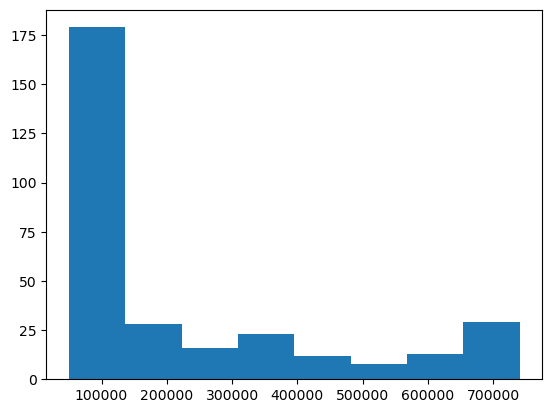

In [19]:
plt.hist(data['Price'],bins=8)

In [20]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000.0
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000.0
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000.0
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000.0


In [21]:
data['Fuel_Capacity']=data['Fuel_Capacity'].str.replace("Litres",'')

In [22]:
data['CC(Cubic capacity)']=data['CC(Cubic capacity)'].str.replace("CC",'')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 24.2+ KB


In [24]:
#data['Fuel_Capacity']=data['Fuel_Capacity'].astype(int)

In [25]:
data['CC(Cubic capacity)']=data['CC(Cubic capacity)'].astype(float)

In [26]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    float64
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 24.2+ KB


In [28]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [29]:
data['Engine_type'].unique()

array(['Single', 'V-twin', 'Boxer', 'Two-Stroke', 'Dual Stroke',
       'Oxidiser-Air inlet'], dtype=object)

<Axes: xlabel='Engine_type'>

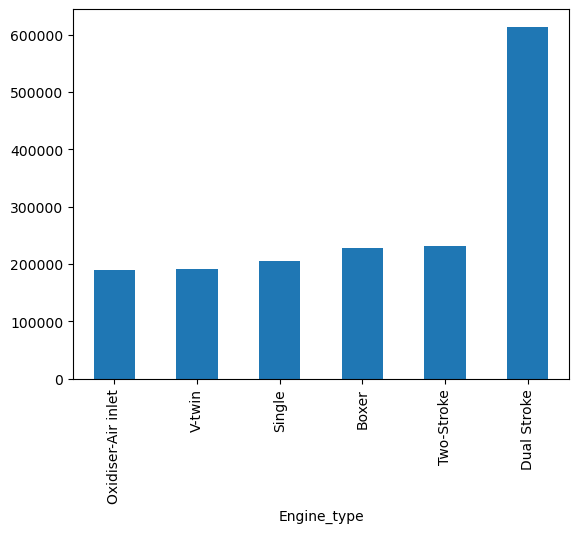

In [30]:
data.groupby('Engine_type')['Price'].mean().sort_values().plot(kind='bar')

In [31]:
data['Fuel_type'].unique()

array(['Petrol', 'Electricity'], dtype=object)

<Axes: xlabel='Fuel_type'>

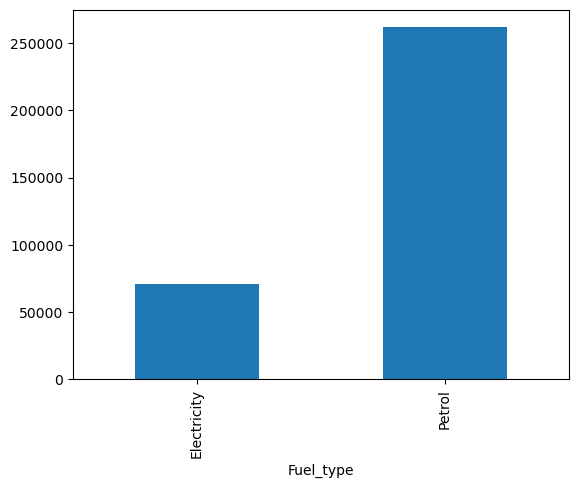

In [32]:
data.groupby('Fuel_type')['Price'].mean().sort_values().plot(kind='bar')

In [33]:
data[data.Engine_type.isin(['Single'])]

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
6,7,Yamaha,Fascino,2018,5.0,Single,Petrol,150.0,16,65000.0
9,10,Kawasaki,Ninja,2011,5.0,Single,Petrol,170.0,19,99999.0
12,13,Banelli,Limperiale,2014,10.0,Single,Petrol,220.0,22,130000.0
...,...,...,...,...,...,...,...,...,...,...
282,283,22Kymco,Like 200,2020,5.0,Single,Electricity,220.0,15,67989.0
283,284,22Kymco,X-Town,2020,5.0,Single,Electricity,235.0,16,69879.0
284,285,TVS,Jupiter,2017,3.0,Single,Petrol,125.0,17,74500.0
285,286,Yamaha,Fascino,2017,4.0,Single,Petrol,125.0,18,75000.0


In [34]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


<Axes: xlabel='Bike_company'>

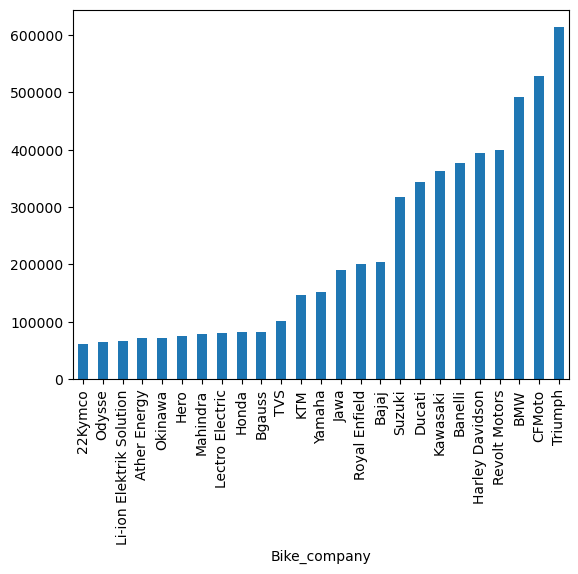

In [35]:
data.groupby('Bike_company')['Price'].mean().sort_values().plot(kind='bar')

In [36]:
pd.pivot_table(data,columns=['Bike_company'],values=['Price'],aggfunc=np.mean)

Bike_company,22Kymco,Ather Energy,BMW,Bajaj,Banelli,Bgauss,CFMoto,Ducati,Harley Davidson,Hero,...,Li-ion Elektrik Solution,Mahindra,Odysse,Okinawa,Revolt Motors,Royal Enfield,Suzuki,TVS,Triumph,Yamaha
Price,61785.0,71377.777778,492291.666667,205052.083333,377114.083333,82291.0,528081.090909,343327.368421,394817.818182,74944.157895,...,66790.909091,78799.352941,65516.5,71892.777778,400283.5,200599.5,317607.25,101312.5,613707.466667,151456.25


In [37]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [38]:
#data['Manufactured_year']=pd.to_datetime(data['Manufactured_year'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    float64
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 24.2+ KB


In [40]:
data['Fuel_Capacity'].isnull().count()

308

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    float64
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 24.2+ KB


In [42]:
from sklearn.impute import SimpleImputer

In [43]:
column=data['Engine_warranty'].values.reshape(-1,1)
column.shape

(308, 1)

In [44]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Engine_warranty']=imputer.fit_transform(column)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     308 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    float64
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 24.2+ KB


In [46]:
data.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [47]:
data.drop(columns=['S.no'],inplace=True)

In [48]:
data.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [49]:
data['mean_price']=data['Price'].mean()

In [50]:
data['mean_price'].head()

0    230670.980519
1    230670.980519
2    230670.980519
3    230670.980519
4    230670.980519
Name: mean_price, dtype: float64

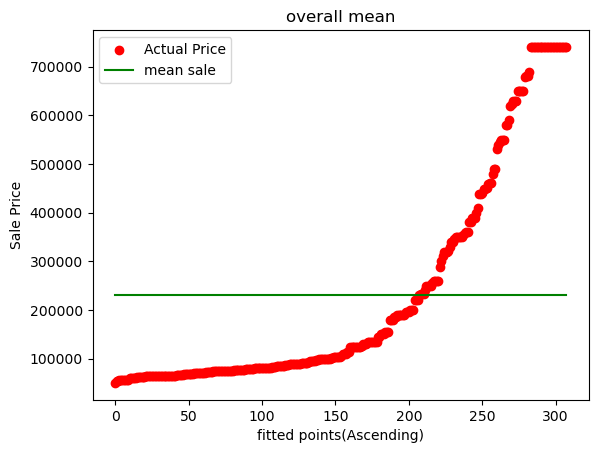

In [51]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Price'].sort_values(),color='r',label='Actual Price')
plt.plot(k,data['mean_price'].sort_values(),color='g',label='mean sale')
plt.xlabel('fitted points(Ascending)')
plt.ylabel('Sale Price')
plt.title('overall mean')
plt.legend()

In [52]:
data['Engine_type'].unique()

array(['Single', 'V-twin', 'Boxer', 'Two-Stroke', 'Dual Stroke',
       'Oxidiser-Air inlet'], dtype=object)

<Axes: xlabel='Engine_type'>

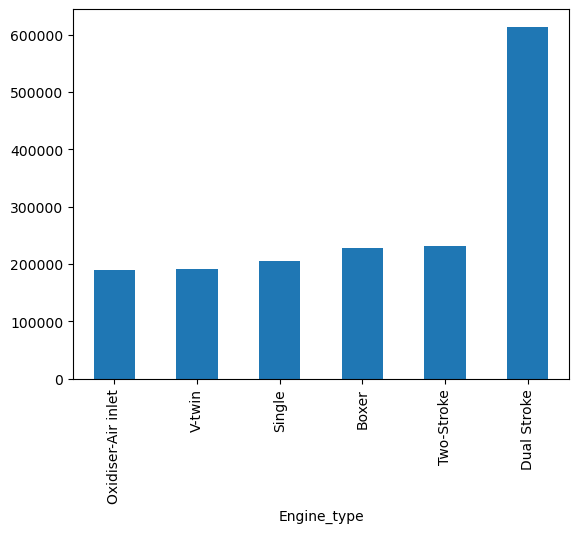

In [53]:
data.groupby('Engine_type')['Price'].mean().sort_values().plot(kind='bar')

In [54]:
#mapping={'Oxidiser-Air intent':'1','V-twin':'1','Single':'1','Boxer':'2','Two-Stroke':'2'}

In [55]:
engine_mean=data.pivot_table(values='Price',columns='Engine_type',aggfunc=np.mean)


In [56]:
engine_mean

Engine_type,Boxer,Dual Stroke,Oxidiser-Air inlet,Single,Two-Stroke,V-twin
Price,228651.979381,613707.466667,189856.714286,204933.506173,230971.296296,191320.641975


In [57]:
data['Engine_means']=0
for i in engine_mean.columns:
    data['Engine_means'][data['Engine_type']==i]=engine_mean[i][0]
data['Engine_means']

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_1716\1840416416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engine_means'][data['Engine_type']==i]=engine_mean[i][0]


0      204933.506173
1      191320.641975
2      228651.979381
3      204933.506173
4      191320.641975
           ...      
303    228651.979381
304    228651.979381
305    228651.979381
306    228651.979381
307    228651.979381
Name: Engine_means, Length: 308, dtype: float64

In [58]:
data.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price,mean_price,Engine_means
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0,230670.980519,204933.506173
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0,230670.980519,191320.641975
2,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0,230670.980519,228651.979381
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0,230670.980519,204933.506173
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0,230670.980519,191320.641975


In [59]:
mean_diff=data['mean_price']-data['Price']

In [60]:
enigine_mean_diff=data['Engine_means']-data['Price']

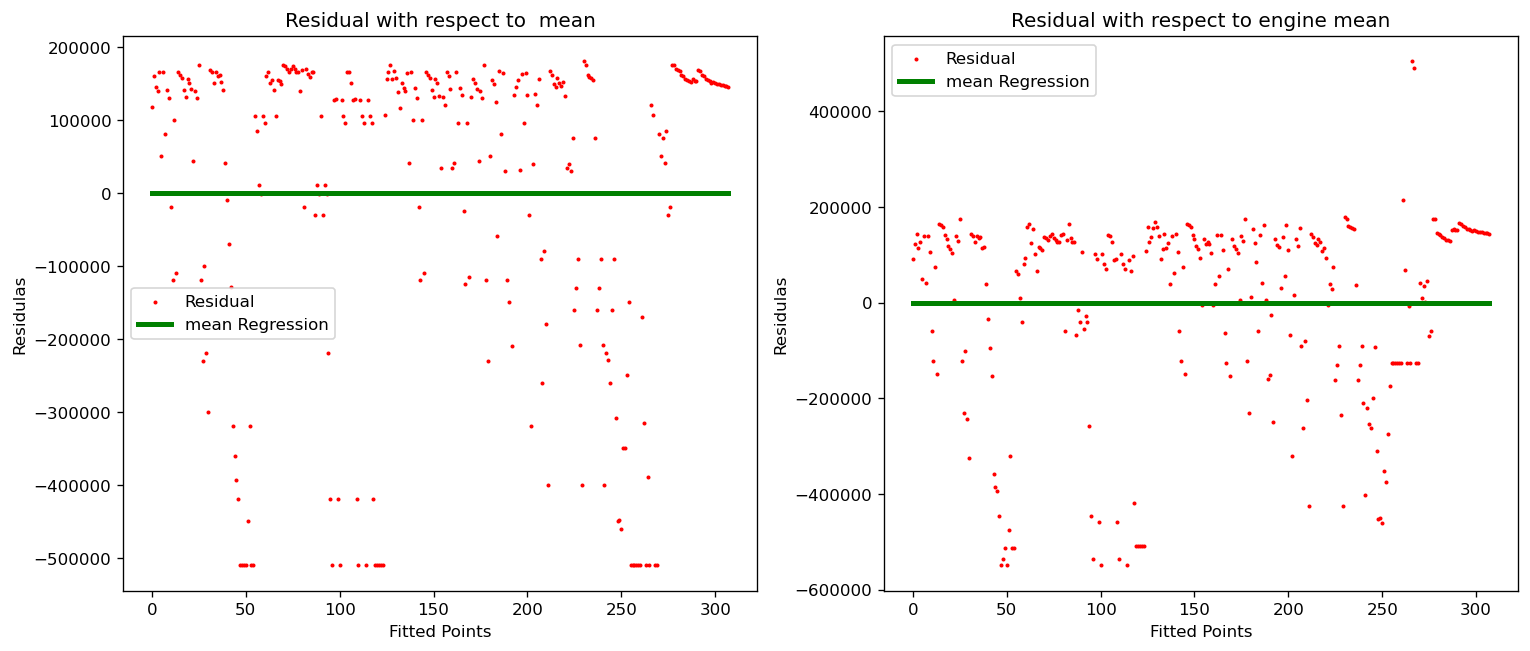

In [61]:
k=range(0,len(data))
l=[0 for i in range(len(data))]
plt.figure(figsize=(15,6),dpi=120)
plt.subplot(1,2,1)
plt.scatter(k,mean_diff,color='r',label='Residual',s=2)
plt.plot(k,l,color='g',label='mean Regression',linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel("Residulas")
plt.title("Residual with respect to  mean")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(k,enigine_mean_diff,color='r',label='Residual',s=2)
plt.plot(k,l,color='g',label='mean Regression',linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel("Residulas")
plt.title("Residual with respect to engine mean")
plt.legend()

In [62]:
Y=data["Price"]
Y_hat1=data["mean_price"]
Y_hat2=data["Engine_means"]
n=len(data)
len(Y),len(Y_hat1),len(Y_hat2),n

(308, 308, 308, 308)

In [63]:
from sklearn.metrics import mean_absolute_error as msa

In [64]:
cost_mean=msa(Y_hat1,Y)
cost_mean

180324.35680553215

In [65]:
cost_eng=msa(Y_hat2,Y)
cost_eng

160713.42471856042

In [66]:
from sklearn.metrics import mean_squared_error as mse

In [67]:
mse_mean=mse(Y_hat1,Y)
mse_mean

48841269571.50611

In [68]:
mse_model=mse(Y_hat2,Y)
mse_model

41075383455.43381

In [69]:
R2=1-(mse_model/mse_mean)

In [70]:
R2

0.15900254404121605

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bike_company        308 non-null    object 
 1   Bike_model          308 non-null    object 
 2   Manufactured_year   308 non-null    int64  
 3   Engine_warranty     308 non-null    float64
 4   Engine_type         308 non-null    object 
 5   Fuel_type           308 non-null    object 
 6   CC(Cubic capacity)  308 non-null    float64
 7   Fuel_Capacity       307 non-null    object 
 8   Price               308 non-null    float64
 9   mean_price          308 non-null    float64
 10  Engine_means        308 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 26.6+ KB


In [72]:
data.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price,mean_price,Engine_means
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0,230670.980519,204933.506173
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0,230670.980519,191320.641975
2,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0,230670.980519,228651.979381
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0,230670.980519,204933.506173
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0,230670.980519,191320.641975


In [74]:
data.to_csv('updated_bike',index=False)

In [80]:
data.drop(columns=['mean_price','Engine_means'],inplace=True)

In [81]:
data.to_csv('bike_imp',index=False)

In [82]:
data=pd.read_csv('bike_imp')

In [83]:
data.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220.0,10,113000.0
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,Hero,Passion,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150.0,13,90000.0
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [85]:
data.drop(columns=['Bike_company','Bike_model'],inplace=True)

In [86]:
data.head()

,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,Single,Petrol,220.0,10,113000.0
1,2020,5.0,V-twin,Petrol,120.0,11,70000.0
2,2020,5.0,Boxer,Petrol,140.0,12,85000.0
3,2020,5.0,Single,Petrol,150.0,13,90000.0
4,2020,5.0,V-twin,Petrol,350.0,14,65000.0


In [87]:
mapping={'Oxidiser-Air intent':'1','V-twin':'1','Single':'1','Boxer':'2','Two-Stroke':'2'}

In [88]:
data['Engine_type']=data['Engine_type'].map(mapping)

In [89]:
data.head()

,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,1,Petrol,220.0,10,113000.0
1,2020,5.0,1,Petrol,120.0,11,70000.0
2,2020,5.0,2,Petrol,140.0,12,85000.0
3,2020,5.0,1,Petrol,150.0,13,90000.0
4,2020,5.0,1,Petrol,350.0,14,65000.0


In [90]:
data['Engine_type'].astype('float')

0      1.0
1      1.0
2      2.0
3      1.0
4      1.0
      ... 
303    2.0
304    2.0
305    2.0
306    2.0
307    2.0
Name: Engine_type, Length: 308, dtype: float64

In [91]:
data.head()

,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,1,Petrol,220.0,10,113000.0
1,2020,5.0,1,Petrol,120.0,11,70000.0
2,2020,5.0,2,Petrol,140.0,12,85000.0
3,2020,5.0,1,Petrol,150.0,13,90000.0
4,2020,5.0,1,Petrol,350.0,14,65000.0


In [98]:
#data.drop(columns=['Fuel_type'],inplace=True)
data.head()

,Manufactured_year,Engine_warranty,Engine_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,1,220.0,10,113000.0
1,2020,5.0,1,120.0,11,70000.0
2,2020,5.0,2,140.0,12,85000.0
3,2020,5.0,1,150.0,13,90000.0
4,2020,5.0,1,350.0,14,65000.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufactured_year   308 non-null    int64  
 1   Engine_warranty     308 non-null    float64
 2   Engine_type         286 non-null    object 
 3   CC(Cubic capacity)  308 non-null    float64
 4   Fuel_Capacity       307 non-null    object 
 5   Price               308 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.6+ KB


In [100]:
data.dropna()

,Manufactured_year,Engine_warranty,Engine_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,1,220.0,10,113000.0
1,2020,5.0,1,120.0,11,70000.0
2,2020,5.0,2,140.0,12,85000.0
3,2020,5.0,1,150.0,13,90000.0
4,2020,5.0,1,350.0,14,65000.0
...,...,...,...,...,...,...
303,2017,3.0,2,185.0,19,81916.0
304,2017,3.0,2,205.0,20,82666.0
305,2017,3.0,2,185.0,21,83416.0
306,2017,3.0,2,205.0,22,84166.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufactured_year   308 non-null    int64  
 1   Engine_warranty     308 non-null    float64
 2   Engine_type         286 non-null    object 
 3   CC(Cubic capacity)  308 non-null    float64
 4   Fuel_Capacity       307 non-null    object 
 5   Price               308 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.6+ KB


In [102]:
column=data['Engine_type'].values.reshape(-1,1)
column.shape

(308, 1)

In [104]:

imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data['Engine_type']=imputer.fit_transform(column)


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufactured_year   308 non-null    int64  
 1   Engine_warranty     308 non-null    float64
 2   Engine_type         308 non-null    float64
 3   CC(Cubic capacity)  308 non-null    float64
 4   Fuel_Capacity       307 non-null    object 
 5   Price               308 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.6+ KB


In [117]:
condition = (data['Fuel_Capacity'] == 'Battery')


In [118]:
data = data.loc[~condition]

In [119]:
data.isnull().count()

Manufactured_year     268
Engine_warranty       268
Engine_type           268
CC(Cubic capacity)    268
Fuel_Capacity         268
Price                 268
dtype: int64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 307
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufactured_year   268 non-null    int64  
 1   Engine_warranty     268 non-null    float64
 2   Engine_type         268 non-null    float64
 3   CC(Cubic capacity)  268 non-null    float64
 4   Fuel_Capacity       267 non-null    object 
 5   Price               268 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.7+ KB


In [121]:
column=data['Fuel_Capacity'].values.reshape(-1,1)
column.shape

(268, 1)

In [126]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
data['Fuel_Capacity']=imputer.fit_transform(column)


C:\Users\Mahesh\AppData\Local\Temp\ipykernel_1716\3596376700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel_Capacity']=imputer.fit_transform(column)


In [123]:
data.head()

,Manufactured_year,Engine_warranty,Engine_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,1.0,220.0,10.0,113000.0
1,2020,5.0,1.0,120.0,11.0,70000.0
2,2020,5.0,2.0,140.0,12.0,85000.0
3,2020,5.0,1.0,150.0,13.0,90000.0
4,2020,5.0,1.0,350.0,14.0,65000.0


In [127]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['Price']
X=scaler.fit_transform(data.drop(columns=['Price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Price']).columns)

In [129]:
X.head()

,Manufactured_year,Engine_warranty,Engine_type,CC(Cubic capacity),Fuel_Capacity
0,0.079605,-0.434717,-0.802603,-0.456652,-2.193535
1,0.079605,-0.434717,-0.802603,-0.892659,-1.963136
2,0.079605,-0.434717,1.245946,-0.805458,-1.732738
3,0.079605,-0.434717,-0.802603,-0.761857,-1.502339
4,0.079605,-0.434717,-0.802603,0.110157,-1.271940


In [130]:
X.corr()

,Manufactured_year,Engine_warranty,Engine_type,CC(Cubic capacity),Fuel_Capacity
Manufactured_year,1.000000,0.071706,-0.075512,0.056242,0.019817
Engine_warranty,0.071706,1.000000,-0.180879,0.423503,0.207387
Engine_type,-0.075512,-0.180879,1.000000,-0.110654,-0.094507
CC(Cubic capacity),0.056242,0.423503,-0.110654,1.000000,0.338387
Fuel_Capacity,0.019817,0.207387,-0.094507,0.338387,1.000000


In [131]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([], 0)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
VIF=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

Manufactured_year     1.010009
Engine_warranty       1.254146
Engine_type           1.042119
CC(Cubic capacity)    1.326058
Fuel_Capacity         1.138683
dtype: float64

In [133]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'Has been Removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
      print(" NO Multicollinearity present anymore")
      return data


In [134]:
for i in range(7):
  vif_data=MC_remover(vif_data)
vif_data.head()

 NO Multicollinearity present anymore
 NO Multicollinearity present anymore
 NO Multicollinearity present anymore
 NO Multicollinearity present anymore
 NO Multicollinearity present anymore
 NO Multicollinearity present anymore
 NO Multicollinearity present anymore


,Manufactured_year,Engine_warranty,Engine_type,CC(Cubic capacity),Fuel_Capacity
0,0.079605,-0.434717,-0.802603,-0.456652,-2.193535
1,0.079605,-0.434717,-0.802603,-0.892659,-1.963136
2,0.079605,-0.434717,1.245946,-0.805458,-1.732738
3,0.079605,-0.434717,-0.802603,-0.761857,-1.502339
4,0.079605,-0.434717,-0.802603,0.110157,-1.271940


In [135]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(Manufactured_year     1.010009
 Engine_warranty       1.254146
 Engine_type           1.042119
 CC(Cubic capacity)    1.326058
 Fuel_Capacity         1.138683
 dtype: float64,
 5)

In [136]:
x=vif_data

In [137]:
y=data['Price']

In [138]:
from sklearn.model_selection import train_test_split as tts

In [139]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.3,random_state=101)

In [140]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((187, 5), (81, 5), (187,), (81,))

In [141]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

In [142]:
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
lr.coef_

array([  2520.49599522,  40189.6787324 ,  32017.82434444, 121875.43222737,
        53839.13507607])

In [145]:
predictions=lr.predict(x_test)

In [146]:
lr.score(x_test,y_test)

0.5689327015218661

Residual plot

In [147]:
residuals=predictions-y_test
residuals_table=pd.DataFrame({'residuals':residuals,'predictions':predictions})
residuals_table=residuals_table.sort_values(by='predictions')

In [148]:
z=[i for i in range(int(residuals_table['predictions'].max()))]
k=[0 for i in range(int(residuals_table['predictions'].max()))]

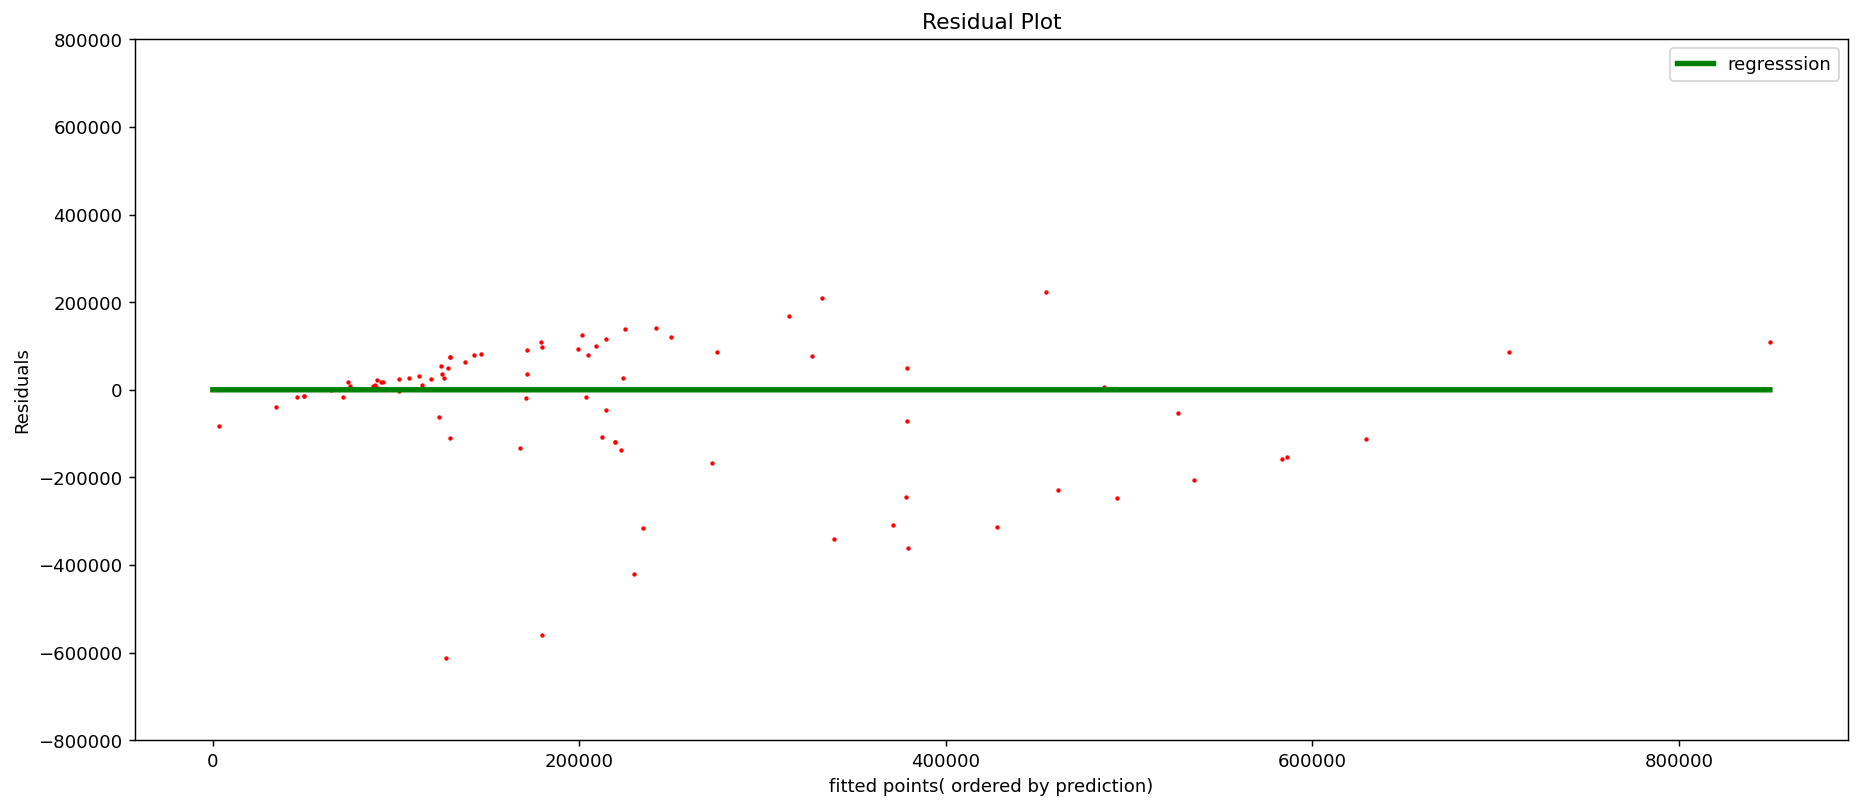

In [149]:
plt.figure(dpi=130,figsize=(17,7))
plt.scatter(residuals_table['predictions'],residuals_table['residuals'],color="r",s=2)
plt.plot(z,k,color='g',linewidth=3,label='regresssion')
plt.ylim(-800000,800000)
plt.xlabel("fitted points( ordered by prediction)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()

C:\Users\Mahesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'distribution of the residuals')

<Figure size 1000x700 with 0 Axes>

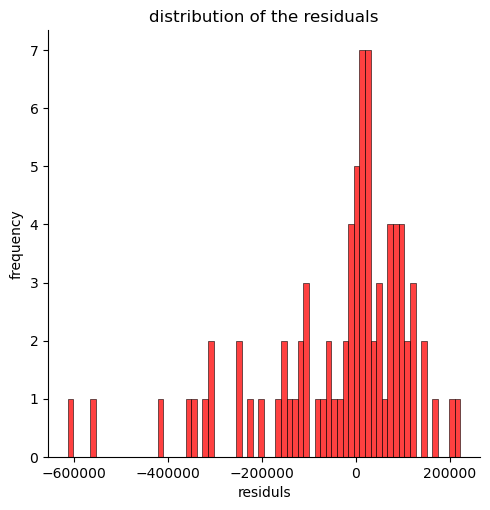

In [153]:
plt.figure(dpi=100,figsize=(10,7))
sns.displot(residuals_table['residuals'],color="r",bins=70)
plt.xlabel('residuls')
plt.ylabel('frequency')
plt.title("distribution of the residuals")

In [154]:
coefficents_table=pd.DataFrame({'column':x_train.columns,'coefficients':lr.coef_})

In [155]:
coefficents_table.head()

,column,coefficients
0,Manufactured_year,2520.495995
1,Engine_warranty,40189.678732
2,Engine_type,32017.824344
3,CC(Cubic capacity),121875.432227
4,Fuel_Capacity,53839.135076


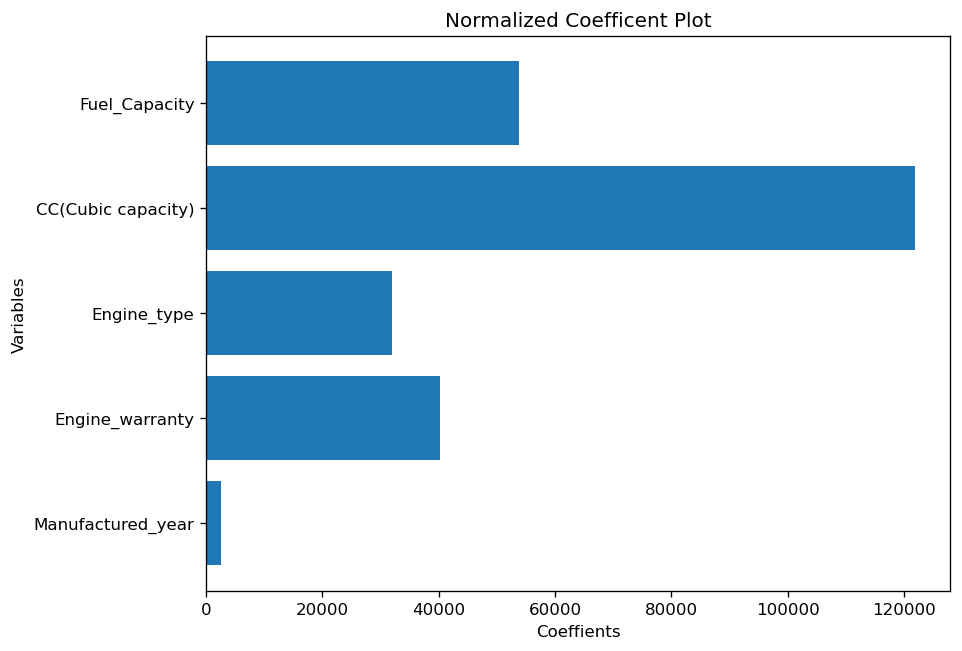

In [156]:
plt.figure(figsize=(8,6),dpi=120)
x=coefficents_table['column']
y=coefficents_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coeffients')
plt.ylabel('Variables')
plt.title('Normalized Coefficent Plot')
plt.show()
